In [3]:
import pickle
import pandas as pd
import numpy as np 
from sklearn.naive_bayes import GaussianNB 

In [4]:
with open ('credit.pkl', 'rb') as f: 
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [5]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [6]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [7]:
#fazendo o treinamento 
naive_dredit_data = GaussianNB()
naive_dredit_data.fit(x_credit_treinamento,y_credit_treinamento)

GaussianNB()

In [8]:
previsoes = naive_dredit_data.predict(x_credit_teste)

In [9]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [10]:
y_credit_teste.array


<PandasArray>
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 ...
 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Length: 500, dtype: int64

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
#acurando as previsões 
accuracy_score(y_credit_teste, previsoes)

0.938

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
#precisão do teste
accuracy_score(y_credit_teste, previsoes) 

0.938

In [15]:
confusion_matrix(y_credit_teste, previsoes) 
#linha 1 = 0 
#linha 2 = 1 
#col 1 = 0 
#col 2 = 1 
#428 q pagam(0) foram classificados como pagantes(0)
#8 que não pagam(1) foram classificados como pagantes(0)
#41 que não pagam(1) foram classificados como não pagantes(1) 
#23 que não pagam(1) foram classificados como pagantes(0)

array([[428,   8],
       [ 23,  41]])

In [16]:
#uma matrix de confusão mais facil de se enchergar 
from yellowbrick.classifier import ConfusionMatrix

0.938

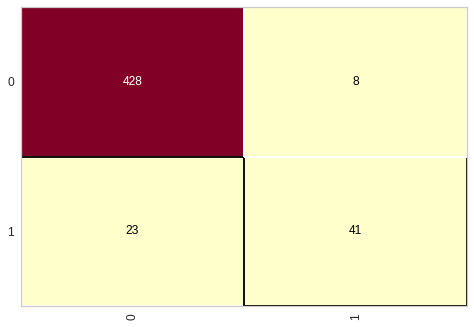

In [17]:
cm = ConfusionMatrix(naive_dredit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento) 
cm.score(x_credit_teste, y_credit_teste)

In [19]:
print(classification_report(y_credit_teste, previsoes))
#o algoritmo consegue indentificar 98% dos clientes que pagam o empréstimo com 95% de precisão 
#e indentifica com 64% os clientes que não pagam com 84% de precisão

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

